<a href="https://colab.research.google.com/github/Beytullah-1001/Deep-Learning-Fundamentals/blob/main/Pytorch/Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn as nn


## Creating own dataset

In [2]:
number_of_points=100
centers=[[-0.5,0.5],[0.5,-0.5]]#Our cluster's centers. 2 dimensional vector
X,y=datasets.make_blobs(n_samples=number_of_points,random_state=42,centers=centers,cluster_std=0.4)#100 point,there are 2 center. First center is (-0.5,0.5) point. Second one is point (0.5,-0.5)
print(X.shape)
print(y.shape)
print(X.dtype)

(100, 2)
(100,)
float64


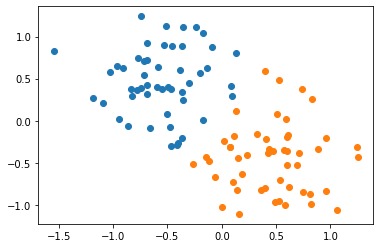

In [5]:
def plot_scatter():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])
plot_scatter()

## Perceptron Model

In [ ]:
class LM(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)

  def forward(self,X):
    pred=torch.sigmoid(self.linear(X))
    return pred





In [ ]:
torch.manual_seed(2)
linear_model=LM(2,1)
print(list(linear_model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [ ]:
[w,b]=linear_model.parameters()
print(w)
print(b)
  

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True)
Parameter containing:
tensor([0.1939], requires_grad=True)


In [ ]:
def get_parameters():
  w1=w[0][0]
  w2=w[0][1]
  return w1.item(),w2.item(),b.item()

In [ ]:
print(get_parameters())

(0.1622033268213272, -0.1682732254266739, 0.1939089596271515)


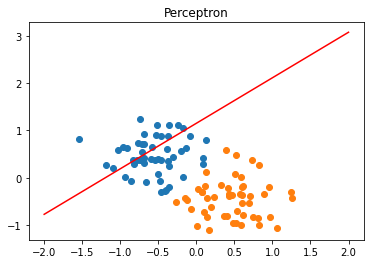

In [ ]:
def plot_fit(title):
  plt.title(title)
  w1,w2,b=get_parameters()
  x1=np.array([-2.0,2.0])
  x2=(w1*x1+b)/-w2
  plt.plot(x1,x2,'r')
  plot_scatter()
plot_fit("Perceptron")


In [ ]:
from torch.nn.modules.linear import Linear
X_data=torch.tensor(X)
y_data=torch.tensor(y.reshape(100,1))
losses=[]
optimizer=torch.optim.SGD(linear_model.parameters(),lr=0.01)#We will use Stochastic gradient descent to train our model
criterion=nn.BCELoss()#We use binary Cross Entropy Loss. 
lm=Linear(2,1)
epochs=1000#Iteration number
losses=[]
for i in range(epochs):#This block of codes run 1000 times
  y_pred=linear_model.forward(X_data.float())#y_pred is equal to the result of forward function.Forward function returns y=wx+b
  loss=criterion(y_pred,y_data.float())#Our loss function.We've used BCE Loss function here. Binary Cross Entropy Loss Function
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  print("Epoch:",i," Loss:",loss.item())

Epoch: 0  Loss: 0.6217145919799805
Epoch: 1  Loss: 0.6207371950149536
Epoch: 2  Loss: 0.6197628378868103
Epoch: 3  Loss: 0.618791401386261
Epoch: 4  Loss: 0.6178229451179504
Epoch: 5  Loss: 0.6168574094772339
Epoch: 6  Loss: 0.6158949136734009
Epoch: 7  Loss: 0.6149352788925171
Epoch: 8  Loss: 0.6139785647392273
Epoch: 9  Loss: 0.6130247712135315
Epoch: 10  Loss: 0.6120738387107849
Epoch: 11  Loss: 0.6111258268356323
Epoch: 12  Loss: 0.6101807355880737
Epoch: 13  Loss: 0.6092384457588196
Epoch: 14  Loss: 0.6082990169525146
Epoch: 15  Loss: 0.6073625683784485
Epoch: 16  Loss: 0.606428861618042
Epoch: 17  Loss: 0.6054979562759399
Epoch: 18  Loss: 0.6045699715614319
Epoch: 19  Loss: 0.6036447882652283
Epoch: 20  Loss: 0.6027223467826843
Epoch: 21  Loss: 0.6018026471138
Epoch: 22  Loss: 0.6008858680725098
Epoch: 23  Loss: 0.5999718308448792
Epoch: 24  Loss: 0.5990604758262634
Epoch: 25  Loss: 0.5981519222259521
Epoch: 26  Loss: 0.5972461104393005
Epoch: 27  Loss: 0.5963429808616638
Epoch: 

## **What is the Binary Cross Entropy Loss Function**


*   Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value. That means how close or far from the actual value. Our target is to classify 100 point by each point's corresponding y values.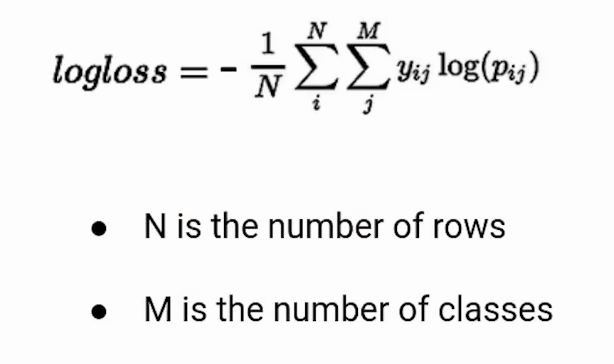




Text(0, 0.5, 'Loss')

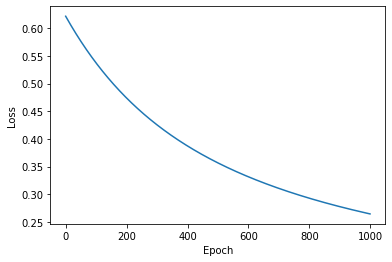

In [ ]:
plt.plot(range(epochs),losses)#We are plotting our data using losses,first argument is our range of epochs
plt.xlabel("Epoch")
plt.ylabel("Loss")

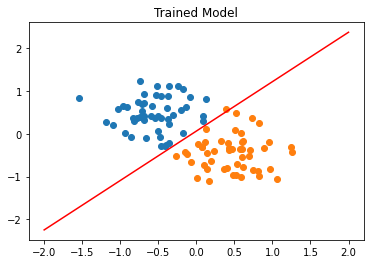

In [ ]:
plot_fit("Trained Model")

As we can see from our model we've successfully classified our data.